In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Paths — EDIT if needed
IMAGE_FOLDER = r"D:\Data science\datasets\Nationality\FairFace\train"

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [2]:
# Load CSV
df = pd.read_csv("nationality.csv")
print("CSV loaded. Rows:", len(df))
print(df.head())
print("Columns:", df.columns)


CSV loaded. Rows: 86744
    file     age  gender        race  service_test
0  1.jpg   50-59    Male  East Asian          True
1  2.jpg   30-39  Female      Indian         False
2  3.jpg  03-Sep  Female     African         False
3  4.jpg   20-29  Female      Indian          True
4  5.jpg   20-29  Female      Indian          True
Columns: Index(['file', 'age', 'gender', 'race', 'service_test'], dtype='object')


In [3]:
IMG_SIZE = 128
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255
    # You can add augmentation here:
    # rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True
)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=IMAGE_FOLDER,
    x_col='file',
    y_col='race',  # <-- use string labels
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    class_mode='categorical',  # categorical works with string labels
    batch_size=BATCH_SIZE,
    shuffle=True
)

# Check class indices
print("Class mapping:", train_generator.class_indices)


Found 86744 validated image filenames belonging to 7 classes.
Class mapping: {'African': 0, 'East Asian': 1, 'Indian': 2, 'Latino_Hispanic': 3, 'Middle Eastern': 4, 'Southeast Asian': 5, 'United Nation': 6}


In [4]:
num_classes = len(train_generator.class_indices)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,550,727 (24.99 MB)

 Trainable params: 6,550,279 (24.99 MB)

 Non-trainable params: 448 (1.75 KB)

In [5]:
EPOCHS = 15

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=EPOCHS
)


Epoch 1/15


D:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2711/2711 ━━━━━━━━━━━━━━━━━━━━ 592s 217ms/step - accuracy: 0.1827 - loss: 2.4199
Epoch 2/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 576s 212ms/step - accuracy: 0.1905 - loss: 1.9332
Epoch 3/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 581s 214ms/step - accuracy: 0.1908 - loss: 1.9322
Epoch 4/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 572s 211ms/step - accuracy: 0.1935 - loss: 1.9311
Epoch 5/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 575s 212ms/step - accuracy: 0.1928 - loss: 1.9312
Epoch 6/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 574s 212ms/step - accuracy: 0.1902 - loss: 1.9325
Epoch 7/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 576s 213ms/step - accuracy: 0.1916 - loss: 1.9317
Epoch 8/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 658s 243ms/step - accuracy: 0.1911 - loss: 1.9324
Epoch 9/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 644s 237ms/step - accuracy: 0.1926 - loss: 1.9316
Epoch 10/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 622s 229ms/step - accuracy: 0.1921 - loss: 1.9315
Epoch 11/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 588s 217ms/step - accuracy: 0.1923 - loss: 1.93

In [6]:
model.save("cnn_nationality_model_generator.h5")
print("✅ Model trained and saved successfully!")


✅ Model trained and saved successfully!


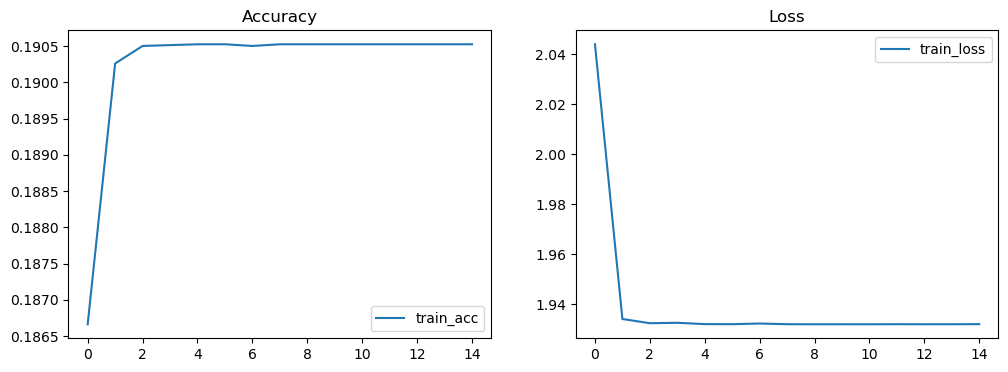

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.title('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


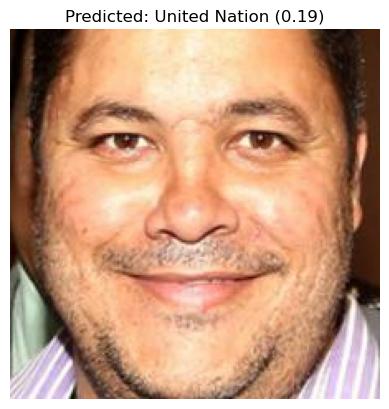

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


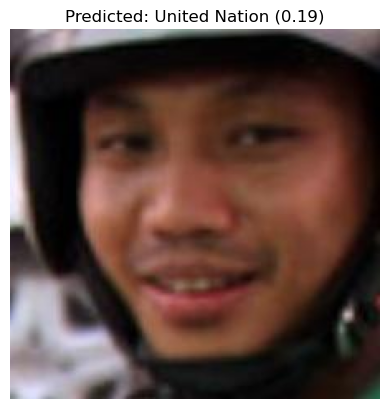

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


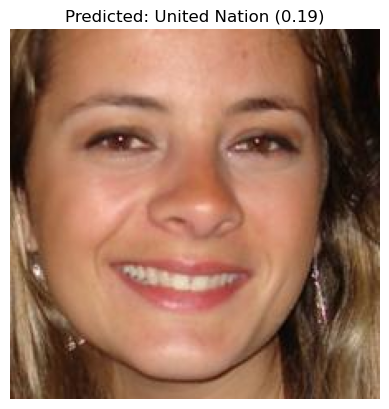

In [11]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

def predict_and_show(filename):
    img_path = IMAGE_FOLDER + "\\" + filename
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    img_input = np.expand_dims(img_resized, axis=0)
    
    pred = model.predict(img_input)[0]
    pred_idx = np.argmax(pred)
    pred_label = list(train_generator.class_indices.keys())[pred_idx]
    conf = pred[pred_idx]

    plt.imshow(img)
    plt.title(f"Predicted: {pred_label} ({conf:.2f})")
    plt.axis('off')
    plt.show()

# Show 3 random predictions from dataset
for i in random.sample(range(len(df)), 3):
    predict_and_show(df.iloc[i]['file'])


In [12]:
df['race'].value_counts()


race
United Nation      16527
Latino_Hispanic    13367
Indian             12319
East Asian         12287
African            12233
Southeast Asian    10795
Middle Eastern      9216
Name: count, dtype: int64

In [13]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights dynamically
class_labels = np.unique(df['race'])
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=class_labels,
    y=df['race']
)
class_weights_dict = dict(zip(range(len(class_labels)), class_weights))
print("Class Weights:", class_weights_dict)


Class Weights: {0: 1.012997629363198, 1: 1.0085456173191178, 2: 1.0059258056660443, 3: 0.9270591755816563, 4: 1.3446180555555556, 5: 1.1479388605836036, 6: 0.7498033520905185}


In [14]:
# Recreate the ImageDataGenerator with augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=IMAGE_FOLDER,
    x_col='file',
    y_col='race',  # using race column directly now
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

# Define CNN model again if not already defined
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(df['race'].unique()), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train with class weights
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    class_weight=class_weights_dict,
    verbose=1
)


Found 86744 validated image filenames belonging to 7 classes.
Epoch 1/25


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2711/2711 ━━━━━━━━━━━━━━━━━━━━ 326s 120ms/step - accuracy: 0.2265 - loss: 1.8804
Epoch 2/25
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 347s 128ms/step - accuracy: 0.3279 - loss: 1.7054
Epoch 3/25
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 338s 125ms/step - accuracy: 0.3586 - loss: 1.6349
Epoch 4/25
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 333s 123ms/step - accuracy: 0.3824 - loss: 1.5844
Epoch 5/25
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 449s 166ms/step - accuracy: 0.3953 - loss: 1.5443
Epoch 6/25
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 461s 170ms/step - accuracy: 0.4074 - loss: 1.5200
Epoch 7/25
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 453s 167ms/step - accuracy: 0.4163 - loss: 1.4887
Epoch 8/25
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 446s 165ms/step - accuracy: 0.4236 - loss: 1.4763
Epoch 9/25
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 446s 165ms/step - accuracy: 0.4370 - loss: 1.4500
Epoch 10/25
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 441s 163ms/step - accuracy: 0.4357 - loss: 1.4449
Epoch 11/25
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 429s 158ms/step - accuracy: 0.4413 - loss: 1.43

In [15]:
# Save the trained model
model.save("nationality_model.h5")
print("✅ Model saved successfully as nationality_model.h5")


✅ Model saved successfully as nationality_model.h5


Model loaded successfully!


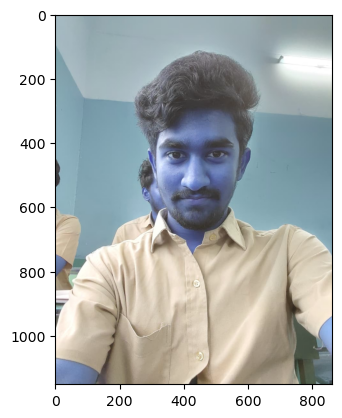

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Predicted Nationality: 0


In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2
# Now load your model
model = load_model('nationality_model.h5')
print("Model loaded successfully!")
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()
# Path to your test image
img_path = "sbb.jpg"
# Load the trained model

# Load and preprocess image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
pred_class = np.argmax(pred, axis=1)[0]

print("Predicted Nationality:", pred_class)
